In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.utils import np_utils
from keras.optimizers import Adam

In [7]:
#Importing given data set into pandas dataframe
Data=pd.read_csv('LendingClub.csv')
Data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
#Extracting the zipcode values from the address column
ZipCode = Data['address'].str[-5:]
Data["zip_code"] = ZipCode
#Replacing address with zipcode in pandas dataframe
Data.drop(columns =["address"], inplace = True) 
Data

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,22690
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,05113
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,05113
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,00813
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Fully Paid,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,30723
395215,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Fully Paid,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,05113
395216,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Fully Paid,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,70466
395217,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Fully Paid,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,29597


In [9]:
#Pre-processing the data to convert all categorical values to numerical values using pandas cat.codes
Data.dtypes
cat_columns = Data.select_dtypes(['object']).columns
cat_columns
Data[cat_columns] = Data[cat_columns].astype('category')
Data.dtypes
Data[cat_columns] = Data[cat_columns].apply(lambda x: x.cat.codes)
Data

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,0,11.44,329.48,1,8,5,117000.0,0,1,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.000000,0.0,3
1,8000.0,0,11.99,265.68,1,9,1,65000.0,0,1,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.000000,0.0,1
2,15600.0,0,10.49,506.97,1,7,5,43057.0,1,1,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.000000,0.0,1
3,7200.0,0,6.49,220.65,0,1,5,54000.0,0,1,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.000000,0.0,0
4,24375.0,1,17.27,609.33,2,14,1,55000.0,2,0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,1,10.99,217.38,1,8,5,40000.0,1,1,...,6.0,0.0,1990.0,34.3,23.0,1,1,0.000000,0.0,5
395215,21000.0,0,12.29,700.42,2,10,1,110000.0,1,1,...,6.0,0.0,43263.0,95.7,8.0,0,1,1.000000,0.0,1
395216,5000.0,0,9.99,161.32,1,5,5,56500.0,2,1,...,15.0,0.0,32704.0,66.9,23.0,0,1,0.000000,0.0,7
395217,21000.0,1,15.31,503.02,2,11,1,64000.0,2,1,...,9.0,0.0,15704.0,53.8,20.0,0,1,5.000000,0.0,4


In [44]:
#Checking for missing values in data
Data.isnull().sum()
#No missing data in dataset
#Describing dataset to check for outliers or skewed features
Data.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
count,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,...,395219.000000,395219.000000,3.952190e+05,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000
mean,14122.061250,0.237772,13.642094,432.069020,1.822109,11.082514,2.899721,7.419937e+04,1.037913,0.803848,...,11.318494,0.178481,1.585165e+04,53.808764,25.426505,0.399457,1.000352,1.787387,0.121722,4.102467
std,8357.054944,0.425719,4.472944,250.700153,1.333686,6.600222,1.924264,6.155725e+04,0.816297,0.397085,...,5.134901,0.531098,2.058427e+04,24.440088,11.885322,0.489787,0.042413,2.063743,0.356273,2.505738
min,500.000000,0.000000,5.320000,16.080000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,0.000000,10.490000,250.330000,1.000000,6.000000,1.000000,4.500000e+04,0.000000,1.000000,...,8.000000,0.000000,6.038000e+03,35.900000,17.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,12000.000000,0.000000,13.330000,375.490000,2.000000,10.000000,1.000000,6.400000e+04,1.000000,1.000000,...,10.000000,0.000000,1.119000e+04,54.800000,24.000000,0.000000,1.000000,1.000000,0.000000,4.000000
75%,20000.000000,0.000000,16.550000,567.790000,3.000000,15.000000,5.000000,9.000000e+04,2.000000,1.000000,...,14.000000,0.000000,1.962600e+04,72.900000,32.000000,1.000000,1.000000,3.000000,0.000000,6.000000
max,40000.000000,1.000000,30.990000,1533.810000,6.000000,34.000000,5.000000,8.706582e+06,2.000000,1.000000,...,90.000000,86.000000,1.743266e+06,892.300000,151.000000,1.000000,2.000000,34.000000,8.000000,9.000000


In [11]:
#Splitting dataset into attribute features and target variable 
#Will we be using loan status to see if the loan applicant defaulted 
y=Data['loan_status']
X=Data.loc[:, Data.columns != 'loan_status']
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,0,11.44,329.48,1,8,5,117000.0,0,12,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.000000,0.0,3
1,8000.0,0,11.99,265.68,1,9,1,65000.0,0,2,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.000000,0.0,1
2,15600.0,0,10.49,506.97,1,7,5,43057.0,1,1,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.000000,0.0,1
3,7200.0,0,6.49,220.65,0,1,5,54000.0,0,1,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.000000,0.0,0
4,24375.0,1,17.27,609.33,2,14,1,55000.0,2,1,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,1,10.99,217.38,1,8,5,40000.0,1,2,...,6.0,0.0,1990.0,34.3,23.0,1,1,0.000000,0.0,5
395215,21000.0,0,12.29,700.42,2,10,1,110000.0,1,2,...,6.0,0.0,43263.0,95.7,8.0,0,1,1.000000,0.0,1
395216,5000.0,0,9.99,161.32,1,5,5,56500.0,2,2,...,15.0,0.0,32704.0,66.9,23.0,0,1,0.000000,0.0,7
395217,21000.0,1,15.31,503.02,2,11,1,64000.0,2,2,...,9.0,0.0,15704.0,53.8,20.0,0,1,5.000000,0.0,4


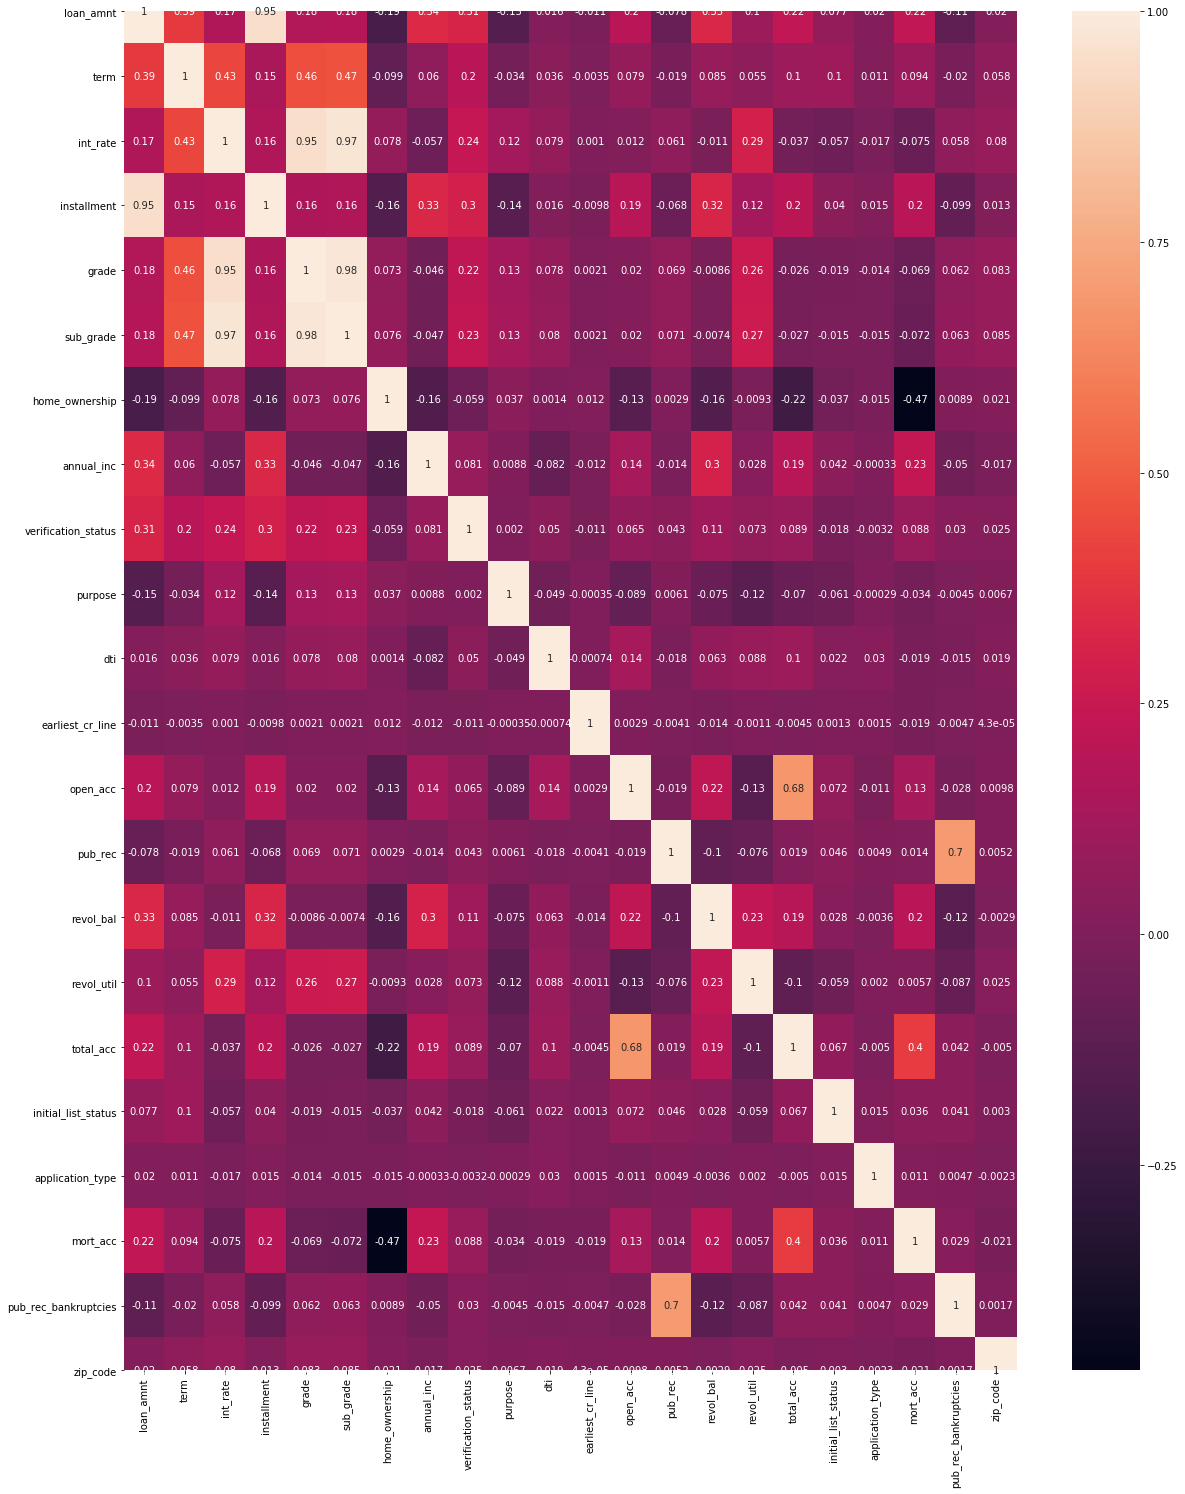

In [100]:
#making correlation map to look for any interesting trends between features
plt.figure(figsize=(20,25))
sns.heatmap(X.corr(),annot=True)
plt.show()
#tried using pairplot, however, it takes a very long time to load

In [15]:
from sklearn.model_selection import train_test_split
#Splitting data set into test set and training set with 70%-30% split
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.3,random_state=100)

In [16]:
from sklearn.preprocessing import MinMaxScaler
#scaling data to try and remove biased caused by the magnitude difference in each feature 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [60]:
#Developing keras Neural Network model with 4 layers
model=Sequential()

model.add(Dense(22,activation='sigmoid'))
#Input layer with 22 input variables

model.add(Dropout(0.2))
#Dropout layer to guard against overfitting
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
#2 Dense layers with 10 neurons and sigmoid activiation as they produced best accuracy
#Sigmoid function is optimal for binary predictions, "default" or "not default"

model.add(Dense(1))
#1 output varible being loan status

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#compiling using adam as the optimizer and binary_crossentropy as the loss function

In [61]:
#model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)
model.fit(x=X_train,y=y_train,batch_size=32,epochs=10)
#fitting model to training data
classes = model.predict_classes(X_test, verbose=0)
#predicting class of output variable for test data set

Epoch 1/10
276653/276653 [==============================] - 7s 25us/sample - loss: 0.4419 - acc: 0.8075
Epoch 2/10
276653/276653 [==============================] - 8s 27us/sample - loss: 0.4171 - acc: 0.8242
Epoch 3/10
276653/276653 [==============================] - 8s 28us/sample - loss: 0.4038 - acc: 0.8359
Epoch 4/10
276653/276653 [==============================] - 7s 26us/sample - loss: 0.3967 - acc: 0.8428
Epoch 5/10
276653/276653 [==============================] - 8s 29us/sample - loss: 0.3845 - acc: 0.8471
Epoch 6/10
276653/276653 [==============================] - 7s 26us/sample - loss: 0.3816 - acc: 0.8490
Epoch 7/10
276653/276653 [==============================] - 7s 27us/sample - loss: 0.3774 - acc: 0.8503
Epoch 8/10
276653/276653 [==============================] - 7s 26us/sample - loss: 0.3727 - acc: 0.8517
Epoch 9/10
276653/276653 [==============================] - 8s 29us/sample - loss: 0.3700 - acc: 0.8518
Epoch 10/10
276653/276653 [==============================] - 7s 

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#computing accuracy of test data predictions
accuracy = accuracy_score(y_test, classes)
print('Accuracy: %f' % accuracy)

#computing precision of test data predictions
precision = precision_score(y_test, classes)
print('Precision: %f' % precision)

#computing recall of test data predictions
recall = recall_score(y_test, classes)
print('Recall: %f' % recall)

#computing f1_score of test data predictions
f1 = f1_score(y_test, classes)
print('F1 score: %f' % f1)

#computing confusion matrix of test data predictions
matrix = confusion_matrix(y_test, classes)
print(matrix)

Accuracy: 0.859656
Precision: 0.853981
Recall: 0.995560
F1 score: 0.919352
[[ 7082 16217]
 [  423 94844]]
